In [1]:
#Import Dependencies
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from config import password
import matplotlib.pyplot as plt


In [2]:
#Create engine using connection string
engine = create_engine("postgres://postgres:" + password + "@flightsdata.cxtoxxxge4vx.us-east-2.rds.amazonaws.com/flightsdata")

In [3]:
#Create a database for 2020 flight data
airlines = pd.read_sql_query("SELECT * FROM airlines", engine)
airlines

,op_carrier_airline_id,op_unique_carrier,op_carrier_name
0,20363,9E,Endeavor Air
1,19805,AA,American Airlines
2,19930,AS,Alaska Airlines
3,20409,B6,Jet Blue
4,19790,DL,Delta Air Lines
5,20366,EV,Atlantic Southeast Airlines
6,20436,F9,Frontier Airlines
7,20368,G4,Allegiant Air
8,19690,HA,Hawaiian Airlines
9,20398,MQ,Envoy Air


In [4]:
airlines.count()

op_carrier_airline_id    17
op_unique_carrier        17
op_carrier_name          17
dtype: int64

In [5]:
airlines.columns = airlines.columns.str.replace('op_unique_carrier','op_carrier')
airlines

,op_carrier_airline_id,op_carrier,op_carrier_name
0,20363,9E,Endeavor Air
1,19805,AA,American Airlines
2,19930,AS,Alaska Airlines
3,20409,B6,Jet Blue
4,19790,DL,Delta Air Lines
5,20366,EV,Atlantic Southeast Airlines
6,20436,F9,Frontier Airlines
7,20368,G4,Allegiant Air
8,19690,HA,Hawaiian Airlines
9,20398,MQ,Envoy Air


In [6]:
#Create a database for 2019 flight data
flight_2019 = pd.read_sql_query("SELECT * FROM flight_data_2019", engine)
flight_2019

,origin,origin_city,day_of_month,day_of_week,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,...,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,dest_city
0,MDW,"chicago,il",2019-01-17,4,19393,WN,N761RR,2084,13232,1323202,...,STL,843.0,0.0,0800-0859,1001.0,0.0,0.0,0.0,251,"saintlouis,mo"
1,MDW,"chicago,il",2019-01-17,4,19393,WN,N8691A,237,13232,1323202,...,TPA,1925.0,0.0,1900-1959,2242.0,0.0,0.0,0.0,997,"tampa,fl"
2,MDW,"chicago,il",2019-01-17,4,19393,WN,N8688J,930,13232,1323202,...,TPA,612.0,0.0,0600-0659,934.0,0.0,0.0,0.0,997,"tampa,fl"
3,MDW,"chicago,il",2019-01-17,4,19393,WN,N8522P,1110,13232,1323202,...,TPA,1233.0,0.0,1200-1259,1552.0,0.0,0.0,0.0,997,"tampa,fl"
4,MDW,"chicago,il",2019-01-17,4,19393,WN,N559WN,2072,13232,1323202,...,TPA,1725.0,1.0,1600-1659,2042.0,1.0,0.0,0.0,997,"tampa,fl"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563121,MDW,"chicago,il",2019-01-17,4,19393,WN,N426WN,291,13232,1323202,...,STL,1346.0,1.0,1300-1359,1439.0,0.0,0.0,0.0,251,"saintlouis,mo"
563122,MDW,"chicago,il",2019-01-17,4,19393,WN,N495WN,549,13232,1323202,...,STL,1145.0,0.0,1100-1159,1243.0,0.0,0.0,0.0,251,"saintlouis,mo"
563123,MDW,"chicago,il",2019-01-17,4,19393,WN,N7711N,750,13232,1323202,...,STL,742.0,0.0,0700-0759,845.0,0.0,0.0,0.0,251,"saintlouis,mo"
563124,MDW,"chicago,il",2019-01-17,4,19393,WN,N465WN,1584,13232,1323202,...,STL,1854.0,0.0,1800-1859,1954.0,0.0,0.0,0.0,251,"saintlouis,mo"


In [7]:
#Create a database for 2020 flight data
flight_2019 = flight_2019.merge(airlines, on ="op_carrier", how="left")
flight_2019.head()

,origin,origin_city,day_of_month,day_of_week,op_carrier_airline_id_x,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,...,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,dest_city,op_carrier_airline_id_y,op_carrier_name
0,MDW,"chicago,il",2019-01-17,4,19393,WN,N761RR,2084,13232,1323202,...,0.0,0800-0859,1001.0,0.0,0.0,0.0,251,"saintlouis,mo",19393,Southwest Airlines
1,MDW,"chicago,il",2019-01-17,4,19393,WN,N8691A,237,13232,1323202,...,0.0,1900-1959,2242.0,0.0,0.0,0.0,997,"tampa,fl",19393,Southwest Airlines
2,MDW,"chicago,il",2019-01-17,4,19393,WN,N8688J,930,13232,1323202,...,0.0,0600-0659,934.0,0.0,0.0,0.0,997,"tampa,fl",19393,Southwest Airlines
3,MDW,"chicago,il",2019-01-17,4,19393,WN,N8522P,1110,13232,1323202,...,0.0,1200-1259,1552.0,0.0,0.0,0.0,997,"tampa,fl",19393,Southwest Airlines
4,MDW,"chicago,il",2019-01-17,4,19393,WN,N559WN,2072,13232,1323202,...,1.0,1600-1659,2042.0,1.0,0.0,0.0,997,"tampa,fl",19393,Southwest Airlines


In [8]:
import datetime as dt
flight_2019['weekday'] = flight_2019[['day_of_month']].apply(lambda x: dt.datetime.strftime(x['day_of_month'], '%A'), axis=1)
flight_2019 = flight_2019.drop('op_carrier_airline_id_y', axis=1)
flight_2019

,origin,origin_city,day_of_month,day_of_week,op_carrier_airline_id_x,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,...,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,dest_city,op_carrier_name,weekday
0,MDW,"chicago,il",2019-01-17,4,19393,WN,N761RR,2084,13232,1323202,...,0.0,0800-0859,1001.0,0.0,0.0,0.0,251,"saintlouis,mo",Southwest Airlines,Thursday
1,MDW,"chicago,il",2019-01-17,4,19393,WN,N8691A,237,13232,1323202,...,0.0,1900-1959,2242.0,0.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday
2,MDW,"chicago,il",2019-01-17,4,19393,WN,N8688J,930,13232,1323202,...,0.0,0600-0659,934.0,0.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday
3,MDW,"chicago,il",2019-01-17,4,19393,WN,N8522P,1110,13232,1323202,...,0.0,1200-1259,1552.0,0.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday
4,MDW,"chicago,il",2019-01-17,4,19393,WN,N559WN,2072,13232,1323202,...,1.0,1600-1659,2042.0,1.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563121,MDW,"chicago,il",2019-01-17,4,19393,WN,N426WN,291,13232,1323202,...,1.0,1300-1359,1439.0,0.0,0.0,0.0,251,"saintlouis,mo",Southwest Airlines,Thursday
563122,MDW,"chicago,il",2019-01-17,4,19393,WN,N495WN,549,13232,1323202,...,0.0,1100-1159,1243.0,0.0,0.0,0.0,251,"saintlouis,mo",Southwest Airlines,Thursday
563123,MDW,"chicago,il",2019-01-17,4,19393,WN,N7711N,750,13232,1323202,...,0.0,0700-0759,845.0,0.0,0.0,0.0,251,"saintlouis,mo",Southwest Airlines,Thursday
563124,MDW,"chicago,il",2019-01-17,4,19393,WN,N465WN,1584,13232,1323202,...,0.0,1800-1859,1954.0,0.0,0.0,0.0,251,"saintlouis,mo",Southwest Airlines,Thursday


In [9]:
#Create a database for 2020 flight data
flight_2020 = pd.read_sql_query("SELECT * FROM flight_data_2020", engine)
flight_2020

,origin,origin_city,day_of_month,day_of_week,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,...,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,dest_city
0,DTW,"detroit,mi",2020-01-30,4,19790,DL,N359NB,1419,11433,1143302,...,ROC,2250.0,1.0,2200-2259,4.0,1.0,0.0,0.0,296,"rochester,ny"
1,DTW,"detroit,mi",2020-01-30,4,19790,DL,N322DN,1421,11433,1143302,...,DCA,655.0,0.0,0700-0759,812.0,0.0,0.0,0.0,405,washingtondc
2,DTW,"detroit,mi",2020-01-30,4,19790,DL,N354DN,1424,11433,1143302,...,MCO,1014.0,0.0,1000-1059,1248.0,0.0,0.0,0.0,957,"orlando,fl"
3,DTW,"detroit,mi",2020-01-30,4,19790,DL,N338DN,1490,11433,1143302,...,LAS,1809.0,0.0,1800-1859,1906.0,0.0,0.0,0.0,1749,"lasvegas,nv"
4,DTW,"detroit,mi",2020-01-30,4,19790,DL,N309US,1492,11433,1143302,...,BOS,1001.0,0.0,1000-1059,1214.0,0.0,0.0,0.0,632,"boston,ma"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596152,DTW,"detroit,mi",2020-01-30,4,19790,DL,N940AT,1296,11433,1143302,...,PHL,1405.0,0.0,1400-1459,1530.0,0.0,0.0,0.0,453,"philadelphia,pa"
596153,DTW,"detroit,mi",2020-01-30,4,19790,DL,N126DU,1307,11433,1143302,...,DFW,846.0,0.0,0800-0859,1051.0,0.0,0.0,0.0,986,"fortworth,tx"
596154,DTW,"detroit,mi",2020-01-30,4,19790,DL,N335NB,1331,11433,1143302,...,MCI,2018.0,0.0,2000-2059,2131.0,0.0,0.0,0.0,629,"kansascity,mo"
596155,DTW,"detroit,mi",2020-01-30,4,19790,DL,N860DN,1357,11433,1143302,...,SFO,1236.0,0.0,1200-1259,1421.0,0.0,0.0,0.0,2079,"sanfrancisco,ca"


In [10]:
flight_2020 = flight_2020.merge(airlines, on ="op_carrier", how="left")
flight_2020.head()

,origin,origin_city,day_of_month,day_of_week,op_carrier_airline_id_x,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,...,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,dest_city,op_carrier_airline_id_y,op_carrier_name
0,DTW,"detroit,mi",2020-01-30,4,19790,DL,N359NB,1419,11433,1143302,...,1.0,2200-2259,4.0,1.0,0.0,0.0,296,"rochester,ny",19790,Delta Air Lines
1,DTW,"detroit,mi",2020-01-30,4,19790,DL,N322DN,1421,11433,1143302,...,0.0,0700-0759,812.0,0.0,0.0,0.0,405,washingtondc,19790,Delta Air Lines
2,DTW,"detroit,mi",2020-01-30,4,19790,DL,N354DN,1424,11433,1143302,...,0.0,1000-1059,1248.0,0.0,0.0,0.0,957,"orlando,fl",19790,Delta Air Lines
3,DTW,"detroit,mi",2020-01-30,4,19790,DL,N338DN,1490,11433,1143302,...,0.0,1800-1859,1906.0,0.0,0.0,0.0,1749,"lasvegas,nv",19790,Delta Air Lines
4,DTW,"detroit,mi",2020-01-30,4,19790,DL,N309US,1492,11433,1143302,...,0.0,1000-1059,1214.0,0.0,0.0,0.0,632,"boston,ma",19790,Delta Air Lines


In [11]:
flight_2020['weekday'] = flight_2020[['day_of_month']].apply(lambda x: dt.datetime.strftime(x['day_of_month'], '%A'), axis=1)
flight_2020 = flight_2020.drop('op_carrier_airline_id_y', axis=1)
flight_2020

,origin,origin_city,day_of_month,day_of_week,op_carrier_airline_id_x,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,...,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,dest_city,op_carrier_name,weekday
0,DTW,"detroit,mi",2020-01-30,4,19790,DL,N359NB,1419,11433,1143302,...,1.0,2200-2259,4.0,1.0,0.0,0.0,296,"rochester,ny",Delta Air Lines,Thursday
1,DTW,"detroit,mi",2020-01-30,4,19790,DL,N322DN,1421,11433,1143302,...,0.0,0700-0759,812.0,0.0,0.0,0.0,405,washingtondc,Delta Air Lines,Thursday
2,DTW,"detroit,mi",2020-01-30,4,19790,DL,N354DN,1424,11433,1143302,...,0.0,1000-1059,1248.0,0.0,0.0,0.0,957,"orlando,fl",Delta Air Lines,Thursday
3,DTW,"detroit,mi",2020-01-30,4,19790,DL,N338DN,1490,11433,1143302,...,0.0,1800-1859,1906.0,0.0,0.0,0.0,1749,"lasvegas,nv",Delta Air Lines,Thursday
4,DTW,"detroit,mi",2020-01-30,4,19790,DL,N309US,1492,11433,1143302,...,0.0,1000-1059,1214.0,0.0,0.0,0.0,632,"boston,ma",Delta Air Lines,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596152,DTW,"detroit,mi",2020-01-30,4,19790,DL,N940AT,1296,11433,1143302,...,0.0,1400-1459,1530.0,0.0,0.0,0.0,453,"philadelphia,pa",Delta Air Lines,Thursday
596153,DTW,"detroit,mi",2020-01-30,4,19790,DL,N126DU,1307,11433,1143302,...,0.0,0800-0859,1051.0,0.0,0.0,0.0,986,"fortworth,tx",Delta Air Lines,Thursday
596154,DTW,"detroit,mi",2020-01-30,4,19790,DL,N335NB,1331,11433,1143302,...,0.0,2000-2059,2131.0,0.0,0.0,0.0,629,"kansascity,mo",Delta Air Lines,Thursday
596155,DTW,"detroit,mi",2020-01-30,4,19790,DL,N860DN,1357,11433,1143302,...,0.0,1200-1259,1421.0,0.0,0.0,0.0,2079,"sanfrancisco,ca",Delta Air Lines,Thursday


In [12]:
flight_2019.count()

origin                     563126
origin_city                563126
day_of_month               563126
day_of_week                563126
op_carrier_airline_id_x    563126
op_carrier                 563126
tail_num                   563126
op_carrier_fl_num          563126
origin_airport_id          563126
origin_airport_seq_id      563126
dest_airport_id            563126
dest_airport_seq_id        563126
dest                       563126
dep_time                   563126
dep_del15                  563126
dep_time_blk               563126
arr_time                   563126
arr_del15                  563126
cancelled                  563126
diverted                   563126
distance                   563126
dest_city                  563126
op_carrier_name            563126
weekday                    563126
dtype: int64

In [13]:
flight_2020.count()

origin                     596157
origin_city                596157
day_of_month               596157
day_of_week                596157
op_carrier_airline_id_x    596157
op_carrier                 596157
tail_num                   596157
op_carrier_fl_num          596157
origin_airport_id          596157
origin_airport_seq_id      596157
dest_airport_id            596157
dest_airport_seq_id        596157
dest                       596157
dep_time                   596157
dep_del15                  596157
dep_time_blk               596157
arr_time                   596157
arr_del15                  596157
cancelled                  596157
diverted                   596157
distance                   596157
dest_city                  596157
op_carrier_name            596157
weekday                    596157
dtype: int64

In [14]:
complete_flights = pd.concat([flight_2019, flight_2020])
complete_flights.head()

,origin,origin_city,day_of_month,day_of_week,op_carrier_airline_id_x,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,...,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,dest_city,op_carrier_name,weekday
0,MDW,"chicago,il",2019-01-17,4,19393,WN,N761RR,2084,13232,1323202,...,0.0,0800-0859,1001.0,0.0,0.0,0.0,251,"saintlouis,mo",Southwest Airlines,Thursday
1,MDW,"chicago,il",2019-01-17,4,19393,WN,N8691A,237,13232,1323202,...,0.0,1900-1959,2242.0,0.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday
2,MDW,"chicago,il",2019-01-17,4,19393,WN,N8688J,930,13232,1323202,...,0.0,0600-0659,934.0,0.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday
3,MDW,"chicago,il",2019-01-17,4,19393,WN,N8522P,1110,13232,1323202,...,0.0,1200-1259,1552.0,0.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday
4,MDW,"chicago,il",2019-01-17,4,19393,WN,N559WN,2072,13232,1323202,...,1.0,1600-1659,2042.0,1.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday


In [15]:
# Airlines and the percentage of delayed flight vs total flights.
df_carrier=pd.DataFrame(complete_flights.groupby(["op_carrier_name","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["Carrier","Not_Delayed","Delayed"])
df_carrier['Flights']= df_carrier.Delayed+ df_carrier.Not_Delayed
df_carrier["Percent_of_delayed"]=df_carrier.Delayed /( df_carrier.Delayed+ df_carrier.Not_Delayed)
df_carrier['Flights']= df_carrier.Delayed+ df_carrier.Not_Delayed
df_carrier.sort_values(by="Flights",ascending=False,inplace=True)
df_carrier.head(18)

,Carrier,Not_Delayed,Delayed,Flights,Percent_of_delayed
14,Southwest Airlines,183147,31796,214943,0.147928
5,Delta Air Lines,135848,17483,153331,0.114021
2,American Airlines,127877,22949,150826,0.152155
13,SkyWest Airlines,107926,23326,131252,0.177719
16,United Airlines,79653,14492,94145,0.153933
12,Midwest Airlines,45643,7746,53389,0.145086
10,Jet Blue,37981,10035,48016,0.208993
7,Envoy Air,39045,8793,47838,0.183808
4,Comair,37998,7844,45842,0.171109
6,Endeavor Air,36284,6270,42554,0.147342


In [16]:
df_carrier.set_index("Carrier", inplace=True)
df_carrier

,Not_Delayed,Delayed,Flights,Percent_of_delayed
Carrier,,,,
Southwest Airlines,183147,31796,214943,0.147928
Delta Air Lines,135848,17483,153331,0.114021
American Airlines,127877,22949,150826,0.152155
SkyWest Airlines,107926,23326,131252,0.177719
United Airlines,79653,14492,94145,0.153933
Midwest Airlines,45643,7746,53389,0.145086
Jet Blue,37981,10035,48016,0.208993
Envoy Air,39045,8793,47838,0.183808
Comair,37998,7844,45842,0.171109


In [17]:
labels = list(df_carrier.index.values)

Text(0, 0.5, 'Percentage of Delay per Carrier')

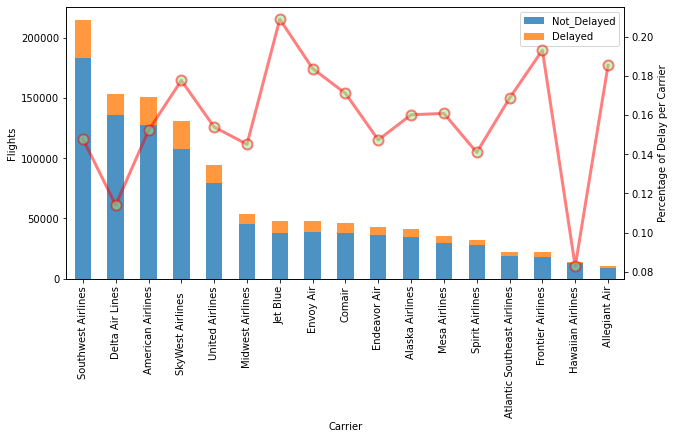

In [18]:
width = .60 # width of a bar

df_carrier[[ 'Not_Delayed', 'Delayed']].plot(kind='bar',stacked=True, alpha=0.8)
plt.ylabel("Flights")
# df_carrier[['Carrier', 'Percent Of Delayed']].set_index("Carrier").plot.line()
df_carrier[ 'Percent_of_delayed'].plot(secondary_y=True,rot=90, color='red', linewidth=3, figsize=(10,5), alpha=0.5, 
          marker='o', markerfacecolor='lightgreen', markeredgewidth=2, markersize=10, markevery=1)
plt.ylabel("Percentage of Delay per Carrier")

In [19]:
# Departure time blocks and the percentage of delayed flight vs total flights.
df_time_blk=pd.DataFrame(complete_flights.groupby(["dep_time_blk","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["Departure_Time_Block","Not_Delayed","Delayed"])
df_time_blk['Flights']= df_time_blk.Delayed+ df_time_blk.Not_Delayed
df_time_blk["Percent_of_delayed"]=df_time_blk.Delayed /( df_time_blk.Delayed+ df_time_blk.Not_Delayed)
df_time_blk['Flights']= df_time_blk.Delayed+ df_time_blk.Not_Delayed
df_time_blk.sort_values(by="Flights", ascending=False,inplace=True)
df_time_blk

,Departure_Time_Block,Not_Delayed,Delayed,Flights,Percent_of_delayed
1,0600-0659,78433,5406,83839,0.0644807
2,0700-0759,70740,6290,77030,0.0816565
3,0800-0859,69046,7641,76687,0.0996388
12,1700-1759,60247,14736,74983,0.196525
6,1100-1159,62287,10850,73137,0.148352
7,1200-1259,61290,11733,73023,0.160675
10,1500-1559,57330,12939,70269,0.184135
5,1000-1059,59747,10088,69835,0.144455
9,1400-1459,56754,12804,69558,0.184077
4,0900-0959,61251,8262,69513,0.118855


In [20]:
df_time_blk.set_index("Departure_Time_Block", inplace=True)
df_time_blk

,Not_Delayed,Delayed,Flights,Percent_of_delayed
Departure_Time_Block,,,,
0600-0659,78433,5406,83839,0.0644807
0700-0759,70740,6290,77030,0.0816565
0800-0859,69046,7641,76687,0.0996388
1700-1759,60247,14736,74983,0.196525
1100-1159,62287,10850,73137,0.148352
1200-1259,61290,11733,73023,0.160675
1500-1559,57330,12939,70269,0.184135
1000-1059,59747,10088,69835,0.144455
1400-1459,56754,12804,69558,0.184077


Text(0, 0.5, 'Percentage of Delay per Departure Time Block')

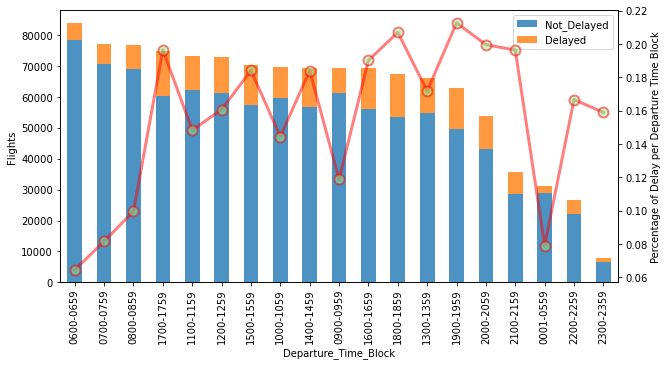

In [21]:
width = .60 # width of a bar

df_time_blk[[ 'Not_Delayed', 'Delayed']].plot(kind='bar',stacked=True, alpha=0.8)
plt.ylabel("Flights")
# df_carrier[['Carrier', 'Percent Of Delayed']].set_index("Carrier").plot.line()
df_time_blk[ 'Percent_of_delayed'].plot(secondary_y=True,rot=90, color='red', linewidth=3, figsize=(10,5), alpha=0.5, 
          marker='o', markerfacecolor='lightgreen', markeredgewidth=2, markersize=10, markevery=1)
plt.ylabel("Percentage of Delay per Departure Time Block")

In [22]:
top_time_blk = df_time_blk.head(10)
top_time_blk

,Not_Delayed,Delayed,Flights,Percent_of_delayed
Departure_Time_Block,,,,
0600-0659,78433,5406,83839,0.0644807
0700-0759,70740,6290,77030,0.0816565
0800-0859,69046,7641,76687,0.0996388
1700-1759,60247,14736,74983,0.196525
1100-1159,62287,10850,73137,0.148352
1200-1259,61290,11733,73023,0.160675
1500-1559,57330,12939,70269,0.184135
1000-1059,59747,10088,69835,0.144455
1400-1459,56754,12804,69558,0.184077


In [23]:
# Cut the per distance into the distance ranges.
distance = complete_flights["distance"]
distance_bins = [0, 250, 500, 750, 1000, 1500, 2000, 2500, 5000]
distance.groupby(pd.cut(distance, distance_bins)).count()

distance
(0, 250]        149607
(250, 500]      288804
(500, 750]      225753
(750, 1000]     176970
(1000, 1500]    179385
(1500, 2000]     71496
(2000, 2500]     45510
(2500, 5000]     21715
Name: distance, dtype: int64

In [24]:
# Establish the distance bins and group names.
distance_bins = [0, 250, 500, 750, 1000, 1500, 2000, 2500, 5000]
group_names = ["<250", "250-500", "500-750", "750-1000", "1000-1500", "1500-2000", "2000-2500", "2500-5000"]

In [25]:
# Categorize distance based on the bins.
complete_flights["Distance Range (in Miles)"] = pd.cut(distance, distance_bins, labels=group_names)

complete_flights.head()

,origin,origin_city,day_of_month,day_of_week,op_carrier_airline_id_x,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,...,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,dest_city,op_carrier_name,weekday,Distance Range (in Miles)
0,MDW,"chicago,il",2019-01-17,4,19393,WN,N761RR,2084,13232,1323202,...,0800-0859,1001.0,0.0,0.0,0.0,251,"saintlouis,mo",Southwest Airlines,Thursday,250-500
1,MDW,"chicago,il",2019-01-17,4,19393,WN,N8691A,237,13232,1323202,...,1900-1959,2242.0,0.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday,750-1000
2,MDW,"chicago,il",2019-01-17,4,19393,WN,N8688J,930,13232,1323202,...,0600-0659,934.0,0.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday,750-1000
3,MDW,"chicago,il",2019-01-17,4,19393,WN,N8522P,1110,13232,1323202,...,1200-1259,1552.0,0.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday,750-1000
4,MDW,"chicago,il",2019-01-17,4,19393,WN,N559WN,2072,13232,1323202,...,1600-1659,2042.0,1.0,0.0,0.0,997,"tampa,fl",Southwest Airlines,Thursday,750-1000


In [26]:
# Establishing percentage of delay per distance range
df_distance=pd.DataFrame(complete_flights.groupby(["Distance Range (in Miles)","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["Distance","Not_Delayed","Delayed"])
df_distance['Flights']= df_distance.Delayed+ df_distance.Not_Delayed
df_distance["Percent_of_delayed"]=df_distance.Delayed /(df_distance.Delayed+ df_distance.Not_Delayed)
df_distance.sort_values(by="Flights",ascending=False,inplace=True)
df_distance.head(8)

,Distance,Not_Delayed,Delayed,Flights,Percent_of_delayed
1,250-500,246276,42528,288804,0.147256
2,500-750,190772,34981,225753,0.154953
4,1000-1500,149793,29592,179385,0.164964
3,750-1000,149698,27272,176970,0.154105
0,<250,127543,22064,149607,0.14748
5,1500-2000,59604,11892,71496,0.166331
6,2000-2500,38844,6666,45510,0.146473
7,2500-5000,18098,3617,21715,0.166567


In [27]:
df_distance.set_index("Distance", inplace=True)

Text(0, 0.5, 'Percentage of Delay per Flight Distance')

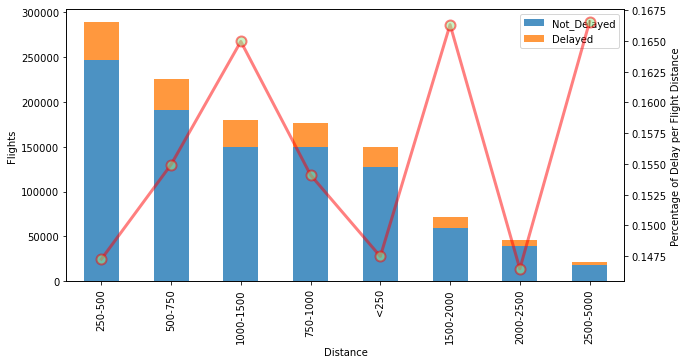

In [28]:
width = .60 # width of a bar

df_distance[[ 'Not_Delayed', 'Delayed']].plot(kind='bar',stacked=True, alpha=0.8)
plt.ylabel("Flights")
# df_carrier[['Carrier', 'Percent Of Delayed']].set_index("Carrier").plot.line()
df_distance[ 'Percent_of_delayed'].plot(secondary_y=True,rot=90, color='red', linewidth=3, figsize=(10,5), alpha=0.5, 
          marker='o', markerfacecolor='lightgreen', markeredgewidth=2, markersize=10, markevery=1)
plt.ylabel("Percentage of Delay per Flight Distance")

In [29]:
# Top 10 origin airports and the percentage of delayed flight vs total flights.
df_org=pd.DataFrame(complete_flights.groupby(["origin_city","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["Origin","Not_Delayed","Delayed"])
df_org['Flights']= df_org.Delayed+ df_org.Not_Delayed
df_org["Percent of Delayed"]=df_org.Delayed /( df_org.Delayed+ df_org.Not_Delayed)
df_org.sort_values(by="Flights",ascending=False,inplace=True)
df_org.head(10)

,Origin,Not_Delayed,Delayed,Flights,Percent of Delayed
16,"atlanta,ga",54973,7723,62696,0.123182
56,"chicago,il",46210,13341,59551,0.224026
212,"newyork,ny",38813,8761,47574,0.184155
104,"fortworth,tx",37456,8478,45934,0.184569
131,"houston,tx",33199,5544,38743,0.143097
52,"charlotte,nc",32714,5663,38377,0.147562
74,"denver,co",32219,6154,38373,0.160373
178,"losangeles,ca",29913,5394,35307,0.152774
322,washingtondc,27807,4968,32775,0.151579
235,"phoenix,az",25769,3962,29731,0.133262


In [30]:
df_org.set_index("Origin", inplace=True)
df_org

,Not_Delayed,Delayed,Flights,Percent of Delayed
Origin,,,,
"atlanta,ga",54973,7723,62696,0.123182
"chicago,il",46210,13341,59551,0.224026
"newyork,ny",38813,8761,47574,0.184155
"fortworth,tx",37456,8478,45934,0.184569
"houston,tx",33199,5544,38743,0.143097
...,...,...,...,...
"portsmouth,nh",26,6,32,0.1875
"hagerstown,md",13,9,22,0.409091
"tafuna,as",17,3,20,0.15


In [31]:
df_origin = df_org.head(10)
df_origin.sort_values(by="Flights",ascending=False,inplace=True)
df_origin

C:\Users\lebat\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Not_Delayed,Delayed,Flights,Percent of Delayed
Origin,,,,
"atlanta,ga",54973,7723,62696,0.123182
"chicago,il",46210,13341,59551,0.224026
"newyork,ny",38813,8761,47574,0.184155
"fortworth,tx",37456,8478,45934,0.184569
"houston,tx",33199,5544,38743,0.143097
"charlotte,nc",32714,5663,38377,0.147562
"denver,co",32219,6154,38373,0.160373
"losangeles,ca",29913,5394,35307,0.152774
washingtondc,27807,4968,32775,0.151579


Text(0, 0.5, 'Percentage of Delay per City Airport')

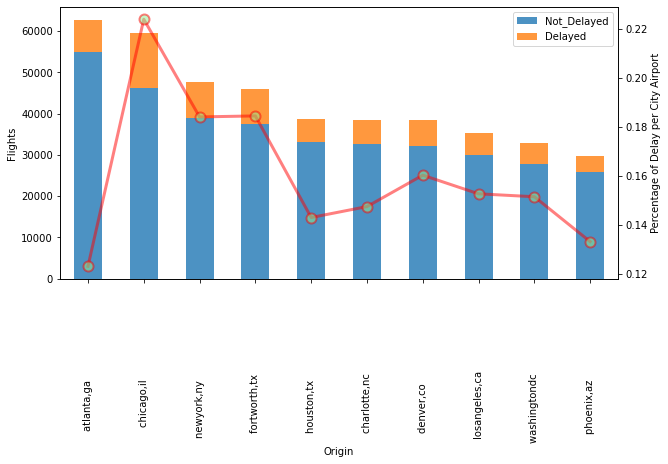

In [32]:
width = .60 # width of a bar

df_origin[[ 'Not_Delayed', 'Delayed']].plot(kind='bar',stacked=True, alpha=0.8)
plt.ylabel('Flights')
# df_carrier[['Carrier', 'Percent Of Delayed']].set_index("Carrier").plot.line()
df_origin[ 'Percent of Delayed'].plot(secondary_y=True,rot=90, color='red', linewidth=3, figsize=(10,5), alpha=0.5, 
          marker='o', markerfacecolor='lightgreen', markeredgewidth=2, markersize=10, markevery=1)
plt.ylabel("Percentage of Delay per City Airport")

In [33]:
# Its clearly seen that most of the flights are on the 4th day. Nearly %20 of flights are delayed of 6th day.
df_weekday=pd.DataFrame(complete_flights.groupby(["weekday","dep_del15"])["origin_airport_id"].count().unstack("dep_del15").reset_index().values,columns=["Weekday","Not_Delayed","Delayed"])
df_weekday['Flights']= df_weekday.Delayed+ df_weekday.Not_Delayed
df_weekday["Percent of Delayed"]=df_weekday.Delayed /( df_weekday.Delayed+ df_weekday.Not_Delayed)
df_weekday.sort_values(by="Flights",ascending=False,inplace=True)
df_weekday.head(10)

,Weekday,Not_Delayed,Delayed,Flights,Percent of Delayed
4,Thursday,165648,32709,198357,0.1649
6,Wednesday,162711,26172,188883,0.138562
0,Friday,149335,28984,178319,0.16254
5,Tuesday,143573,21734,165307,0.131477
1,Monday,133130,24433,157563,0.155068
3,Sunday,124379,23587,147966,0.159408
2,Saturday,101887,21001,122888,0.170895


In [34]:
df_weekday.set_index("Weekday", inplace=True)

Text(0, 0.5, 'Percentage of Delay per Weekday')

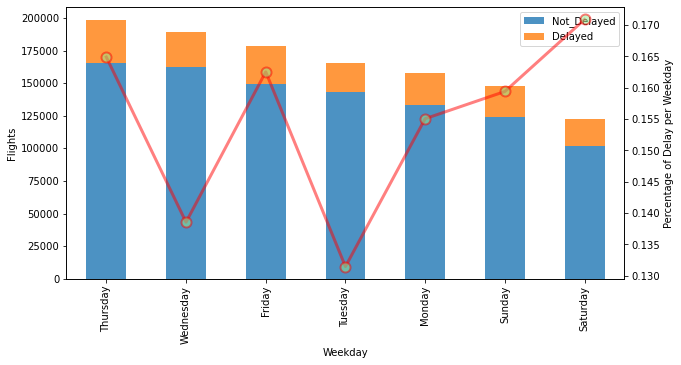

In [35]:
width = .60 # width of a bar

df_weekday[[ 'Not_Delayed', 'Delayed']].plot(kind='bar',stacked=True, alpha=0.8)
plt.ylabel('Flights')
# df_carrier[['Carrier', 'Percent Of Delayed']].set_index("Carrier").plot.line()
df_weekday[ 'Percent of Delayed'].plot(secondary_y=True,rot=90, color='red', linewidth=3, figsize=(10,5), alpha=0.5, 
          marker='o', markerfacecolor='lightgreen', markeredgewidth=2, markersize=10, markevery=1)
plt.ylabel("Percentage of Delay per Weekday")